<a href="https://colab.research.google.com/github/NilienaCelineBiju/SURGE-2023/blob/main/Working_with_Simulated_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

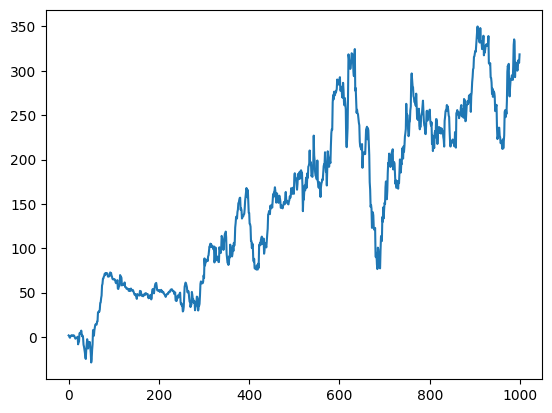

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(128)

n_data = 1
dataset = []
for participant in range(n_data):
    input_data = []
    kappa_1 = 1.0
    omega_1 = -10.0
    omega_2 = -10.0
    mu_1 = 0.0
    mu_2 = 0.0
    pi_1 = 1e4
    pi_2 = 1e1

    # two-level hierarchical gaussian random walk
    for i in range(1000):

        # x2
        pi_2 = rng.exponential(np.absolute(omega_2))
        mu_2 = rng.normal(mu_2, pi_2**.5)

        # x1
        pi_1 = rng.exponential(np.absolute(kappa_1 * mu_2 + omega_1))
        mu_1 = rng.normal(mu_1, pi_1**.5)

        # input node
        u = rng.normal(mu_1, 1e-4**.5)
        input_data.append(u)

    dataset.append(np.array(input_data))

    for rw in dataset:
      plt.plot(rw)

In [ ]:
!pip install pyhgf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.7 MB/s eta 0:00:00


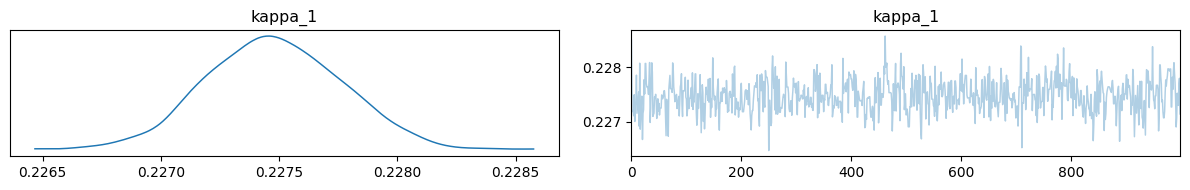

In [ ]:
import jax.numpy as jnp
import pymc as pm
import arviz as az
from pyhgf.distribution import HGFDistribution
from pyhgf.response import first_level_binary_surprise

hgf_logp_op = HGFDistribution(
    n_levels=2,
    model_type="continuous",
    input_data=dataset,
)

with pm.Model() as model:

    # Priors
    #-------
    kappa_1 = pm.Normal("kappa_1", mu=1.0, sigma=2.0, shape=n_data)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=-10.0,
            omega_2=-10.0,
            omega_input=np.log(1e-4),
            rho_1=0.0,
            rho_2=0.0,
            pi_1=1e4,
            pi_2=1e1,
            mu_1=0.0,
            mu_2=0.0,
            kappa_1=kappa_1,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

    with model:
      idata = pm.sample(chains=1)

    az.plot_trace(idata);
    plt.tight_layout()

Decreasing omega_1 - very random values fro each run, long running times, sometimes shows hgf_loglike = -inf error

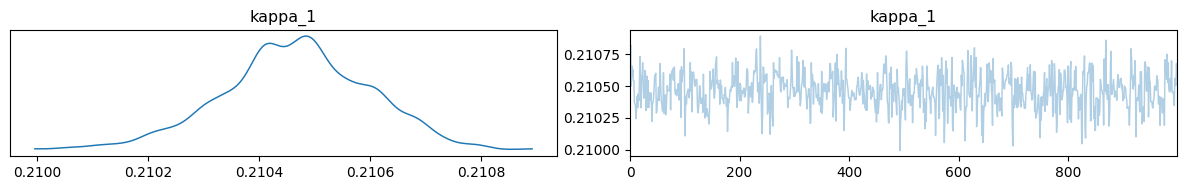

In [ ]:

with pm.Model() as model:
    # Priors
    #-------
    kappa_1 = pm.Normal("kappa_1", mu=1.0, sigma=2.0, shape=n_data)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=-10.9,
            omega_2=-10.0,
            omega_input=np.log(1e-4),
            rho_1=0.0,
            rho_2=0.0,
            pi_1=1e4,
            pi_2=1e1,
            mu_1=0.0,
            mu_2=0.0,
            kappa_1=kappa_1,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

    with model:
      idata = pm.sample(chains=1)

    az.plot_trace(idata);
    plt.tight_layout()
#very high running time for -10.9

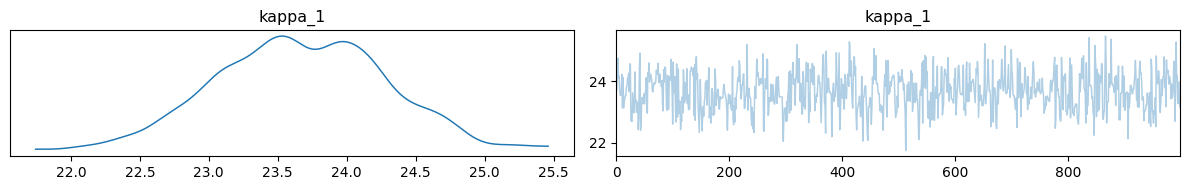

In [ ]:
with pm.Model() as model:
    # Priors
    #-------
    kappa_1 = pm.Normal("kappa_1", mu=1.0, sigma=2.0, shape=n_data)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=--9.0,
            omega_2=-10.0,
            omega_input=np.log(1e-4),
            rho_1=0.0,
            rho_2=0.0,
            pi_1=1e4,
            pi_2=1e1,
            mu_1=0.0,
            mu_2=0.0,
            kappa_1=kappa_1,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

    with model:
      idata = pm.sample(chains=1)

    az.plot_trace(idata);
    plt.tight_layout()

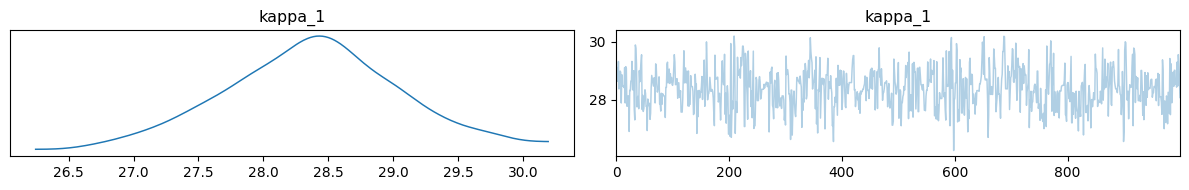

In [ ]:
with pm.Model() as model:
    # Priors
    #-------
    kappa_1 = pm.Normal("kappa_1", mu=1.0, sigma=2.0, shape=n_data)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=-8.0,
            omega_2=-10.0,
            omega_input=np.log(1e-4),
            rho_1=0.0,
            rho_2=0.0,
            pi_1=1e4,
            pi_2=1e1,
            mu_1=0.0,
            mu_2=0.0,
            kappa_1=kappa_1,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

    with model:
      idata = pm.sample(chains=1)

    az.plot_trace(idata);
    plt.tight_layout()

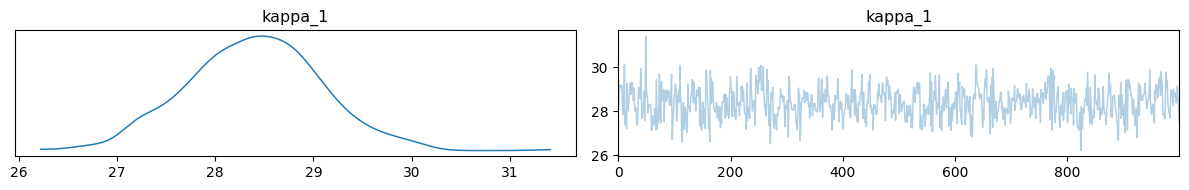

In [ ]:
with pm.Model() as model:
    # Priors
    #-------
    kappa_1 = pm.Normal("kappa_1", mu=1.0, sigma=2.0, shape=n_data)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=-8.0,
            omega_2=-10.0,
            omega_input=np.log(1e-4),
            rho_1=0.0,
            rho_2=0.0,
            pi_1=1e4,
            pi_2=1e1,
            mu_1=0.0,
            mu_2=0.0,
            kappa_1=kappa_1,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

    with model:
      idata = pm.sample(chains=1)

    az.plot_trace(idata);
    plt.tight_layout()

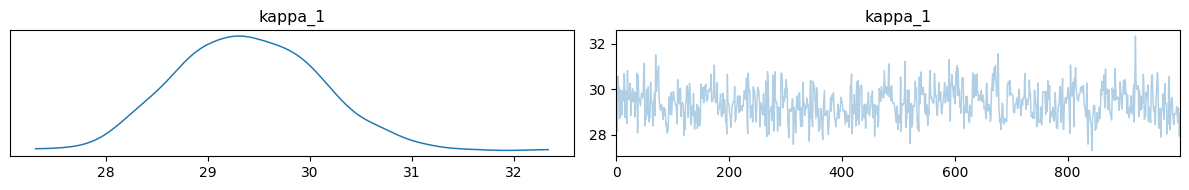

In [ ]:
with pm.Model() as model:
    # Priors
    #-------
    kappa_1 = pm.Normal("kappa_1", mu=1.0, sigma=2.0, shape=n_data)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=-7.0,
            omega_2=-10.0,
            omega_input=np.log(1e-4),
            rho_1=0.0,
            rho_2=0.0,
            pi_1=1e4,
            pi_2=1e1,
            mu_1=0.0,
            mu_2=0.0,
            kappa_1=kappa_1,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

    with model:
      idata = pm.sample(chains=1)

    az.plot_trace(idata);
    plt.tight_layout()

In [ ]:
with pm.Model() as model:
    # Priors
    #-------
    kappa_1 = pm.Normal("kappa_1", mu=1.0, sigma=2.0, shape=n_data)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=-6.0,
            omega_2=-10.0,
            omega_input=np.log(1e-4),
            rho_1=0.0,
            rho_2=0.0,
            pi_1=1e4,
            pi_2=1e1,
            mu_1=0.0,
            mu_2=0.0,
            kappa_1=kappa_1,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

    with model:
      idata = pm.sample(chains=1)

    az.plot_trace(idata);
    plt.tight_layout()

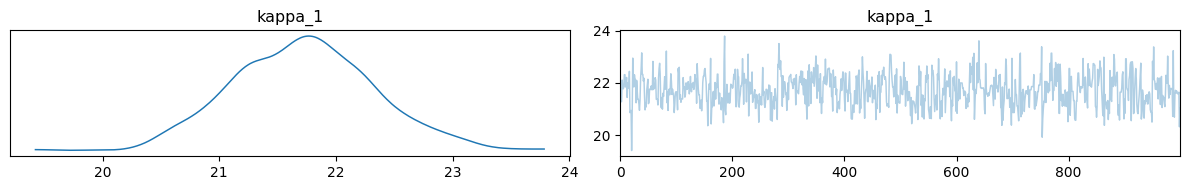

In [ ]:
with pm.Model() as model:
    # Priors
    #-------
    kappa_1 = pm.Normal("kappa_1", mu=1.0, sigma=2.0, shape=n_data)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=-10.,
            omega_2=-10.0,
            omega_input=np.log(1e-4),
            rho_1=0.0,
            rho_2=0.0,
            pi_1=1e4,
            pi_2=1e1,
            mu_1=0.0,
            mu_2=0.0,
            kappa_1=kappa_1,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

    with model:
      idata = pm.sample(chains=1)

    az.plot_trace(idata);
    plt.tight_layout()